In [1]:
import math
import torch
import hess
import matplotlib.pyplot as plt
import numpy as np
from hess.nets import Transformer
import hess.loss_surfaces as loss_surfaces

In [2]:
nx = 500
train_x = torch.linspace(0, 10, nx).unsqueeze(-1)
train_y = torch.sin(train_x * math.pi) + torch.sin(train_x)

In [3]:
optimus = Transformer(train_x, train_y, n_hidden=2, hidden_size=10,
                     activation=torch.nn.Tanh())

In [4]:
trained_pars = torch.load("../hess/saved-models/toy_regression.pt", map_location="cpu")

In [5]:
optimus.net.load_state_dict(trained_pars)

<All keys matched successfully>

In [6]:
hessian = torch.load("../hess/saved-models/toy_hessian.pt", map_location="cpu")

In [7]:
e_val, e_vec = np.linalg.eig(hessian)
idx = np.abs(e_val).argsort()[::-1]   
e_val = torch.FloatTensor(e_val[idx].real)
e_vec = torch.FloatTensor(e_vec[:,idx].real)

### Get loss surface

In [15]:
basis = e_vec[:, 0:2]
loss_surf = loss_surfaces.get_loss_surface(basis, optimus.net, train_x, train_y,
                                          rng=2, n_pts=100)

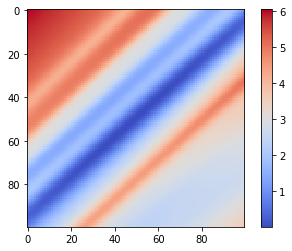

In [16]:
plt.imshow(loss_surf.detach(), cmap='coolwarm')
plt.colorbar()

In [17]:
low_basis = e_vec[:, -20:]
low_loss_surf = loss_surfaces.get_loss_surface(low_basis, optimus.net, train_x, train_y,
                                          rng=20, n_pts =100)

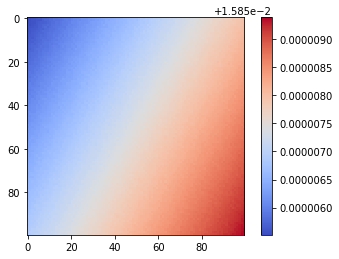

In [18]:
plt.imshow(low_loss_surf.detach(), cmap='coolwarm')
plt.colorbar()

In [19]:
rand_basis = torch.randn(e_vec.size(0), 3)
rand_loss_surf = loss_surfaces.get_loss_surface(rand_basis, optimus.net, train_x, train_y,
                                          rng=10, n_pts=100)

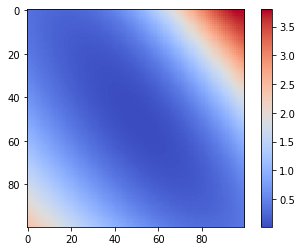

In [14]:
plt.imshow(rand_loss_surf.detach(), cmap='coolwarm')
plt.colorbar()